In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
event_df = pd.read_csv('dataset/athlete_events.csv')
region_df = pd.read_csv('dataset/noc_regions.csv')

In [3]:
event_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [4]:
region_df.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [5]:
print(event_df.shape)
print(region_df.shape)

(271116, 15)
(230, 3)


In [6]:
# filtering only the summer season
event_df = event_df[event_df['Season'] == 'Summer']
event_df.shape

(222552, 15)

In [7]:
# merging the two dataset
event_df = event_df.merge(region_df, how='left', on='NOC')
event_df.sample(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
46204,28182,Maimouna Diarra,F,25.0,198.0,90.0,Senegal,SEN,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Senegal,NaN
193850,118481,Kristine Elisabeth Tnnander,F,28.0,179.0,61.0,Sweden,SWE,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's Heptathlon,NaN,Sweden,NaN


In [8]:
# country's participated
event_df['region'].unique().shape

(206,)

In [9]:
event_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [10]:
event_df.duplicated().sum()

1385

In [11]:
event_df.drop_duplicates(inplace=True)
event_df.duplicated().sum()

0

In [12]:
event_df = pd.concat([event_df, pd.get_dummies(event_df['Medal'])], axis=1)
event_df.sample(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
184297,112714,Per Michael Sderlund,M,18.0,181.0,75.0,Sweden,SWE,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Backstroke,NaN,Sweden,NaN,0,0,0
216446,131850,Adeline Wuillme,F,20.0,171.0,62.0,France,FRA,1996 Summer,1996,Summer,Atlanta,Fencing,"Fencing Women's Foil, Individual",NaN,France,NaN,0,0,0


In [13]:
event_df.groupby(by='NOC').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [14]:
medal_tally = event_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
medal_tally.shape

(105636, 20)

In [15]:
medal_tally = medal_tally.groupby('NOC').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_tally.shape

(230, 4)

In [16]:
medal_tally[medal_tally['NOC'] == 'IND']

,NOC,Gold,Silver,Bronze
53,IND,9,7,12


In [17]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally.head(2)

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005


### Overall Analysis
- No. of editions
- No. of Cities
- No of events/sports
- No of athelets
- participating nations

In [18]:
event_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [19]:
# no of edition
# 1906 Olympic is not considered
print(event_df['Year'].unique().shape[0]-1)
print(event_df['Year'].unique())

28
[1992 2012 1920 1900 1932 1952 2000 1996 1912 1924 1948 2008 2016 2004
 1984 1968 1972 1988 1936 1956 1960 1928 1976 1980 1964 1906 1904 1908
 1896]


In [20]:
# no of cities
print(event_df['City'].unique().shape[0])
print(event_df['City'].unique())

23
['Barcelona' 'London' 'Antwerpen' 'Paris' 'Los Angeles' 'Helsinki'
 'Sydney' 'Atlanta' 'Stockholm' 'Beijing' 'Rio de Janeiro' 'Athina'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Melbourne' 'Roma' 'Amsterdam'
 'Montreal' 'Moskva' 'Tokyo' 'St. Louis']


In [21]:
# no of sports
print(event_df['Sport'].unique().shape[0])
print(event_df['Sport'].unique())

52
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [22]:
# no of events
print(event_df['Event'].unique().shape[0])
print(event_df['Event'].unique()[:10:])

651
["Basketball Men's Basketball" "Judo Men's Extra-Lightweight"
 "Football Men's Football" "Tug-Of-War Men's Tug-Of-War"
 "Athletics Women's 100 metres" "Athletics Women's 4 x 100 metres Relay"
 "Swimming Men's 400 metres Freestyle" "Badminton Men's Singles"
 "Sailing Women's Windsurfer" "Swimming Men's 200 metres Breaststroke"]


In [23]:
# No. of athelets
print(event_df['Name'].unique().shape[0])

116122


In [24]:
# Number of participating nation
print(event_df['region'].unique().shape[0])

206


### Graph Plot

In [25]:
# participating nation each year
# removing the duplicate rows where year & region is same
nation_over_time = event_df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')
nation_over_time = nation_over_time.rename(columns={'index': 'Edition', 'Year':'No. of Countries'})

In [26]:
import plotly.express as px
fig = px.line(nation_over_time, x='Edition', y='No. of Countries')
fig.show()


In [27]:
# participating nation each year
# removing the duplicate rows where year & region is same
event_over_time = event_df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('index')
event_over_time = event_over_time.rename(columns={'index': 'Edition', 'Year':'No. of Events'})

fig = px.line(event_over_time, x='Edition', y='No. of Events')
fig.show()


In [28]:
event_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


<AxesSubplot: xlabel='Year', ylabel='Sport'>

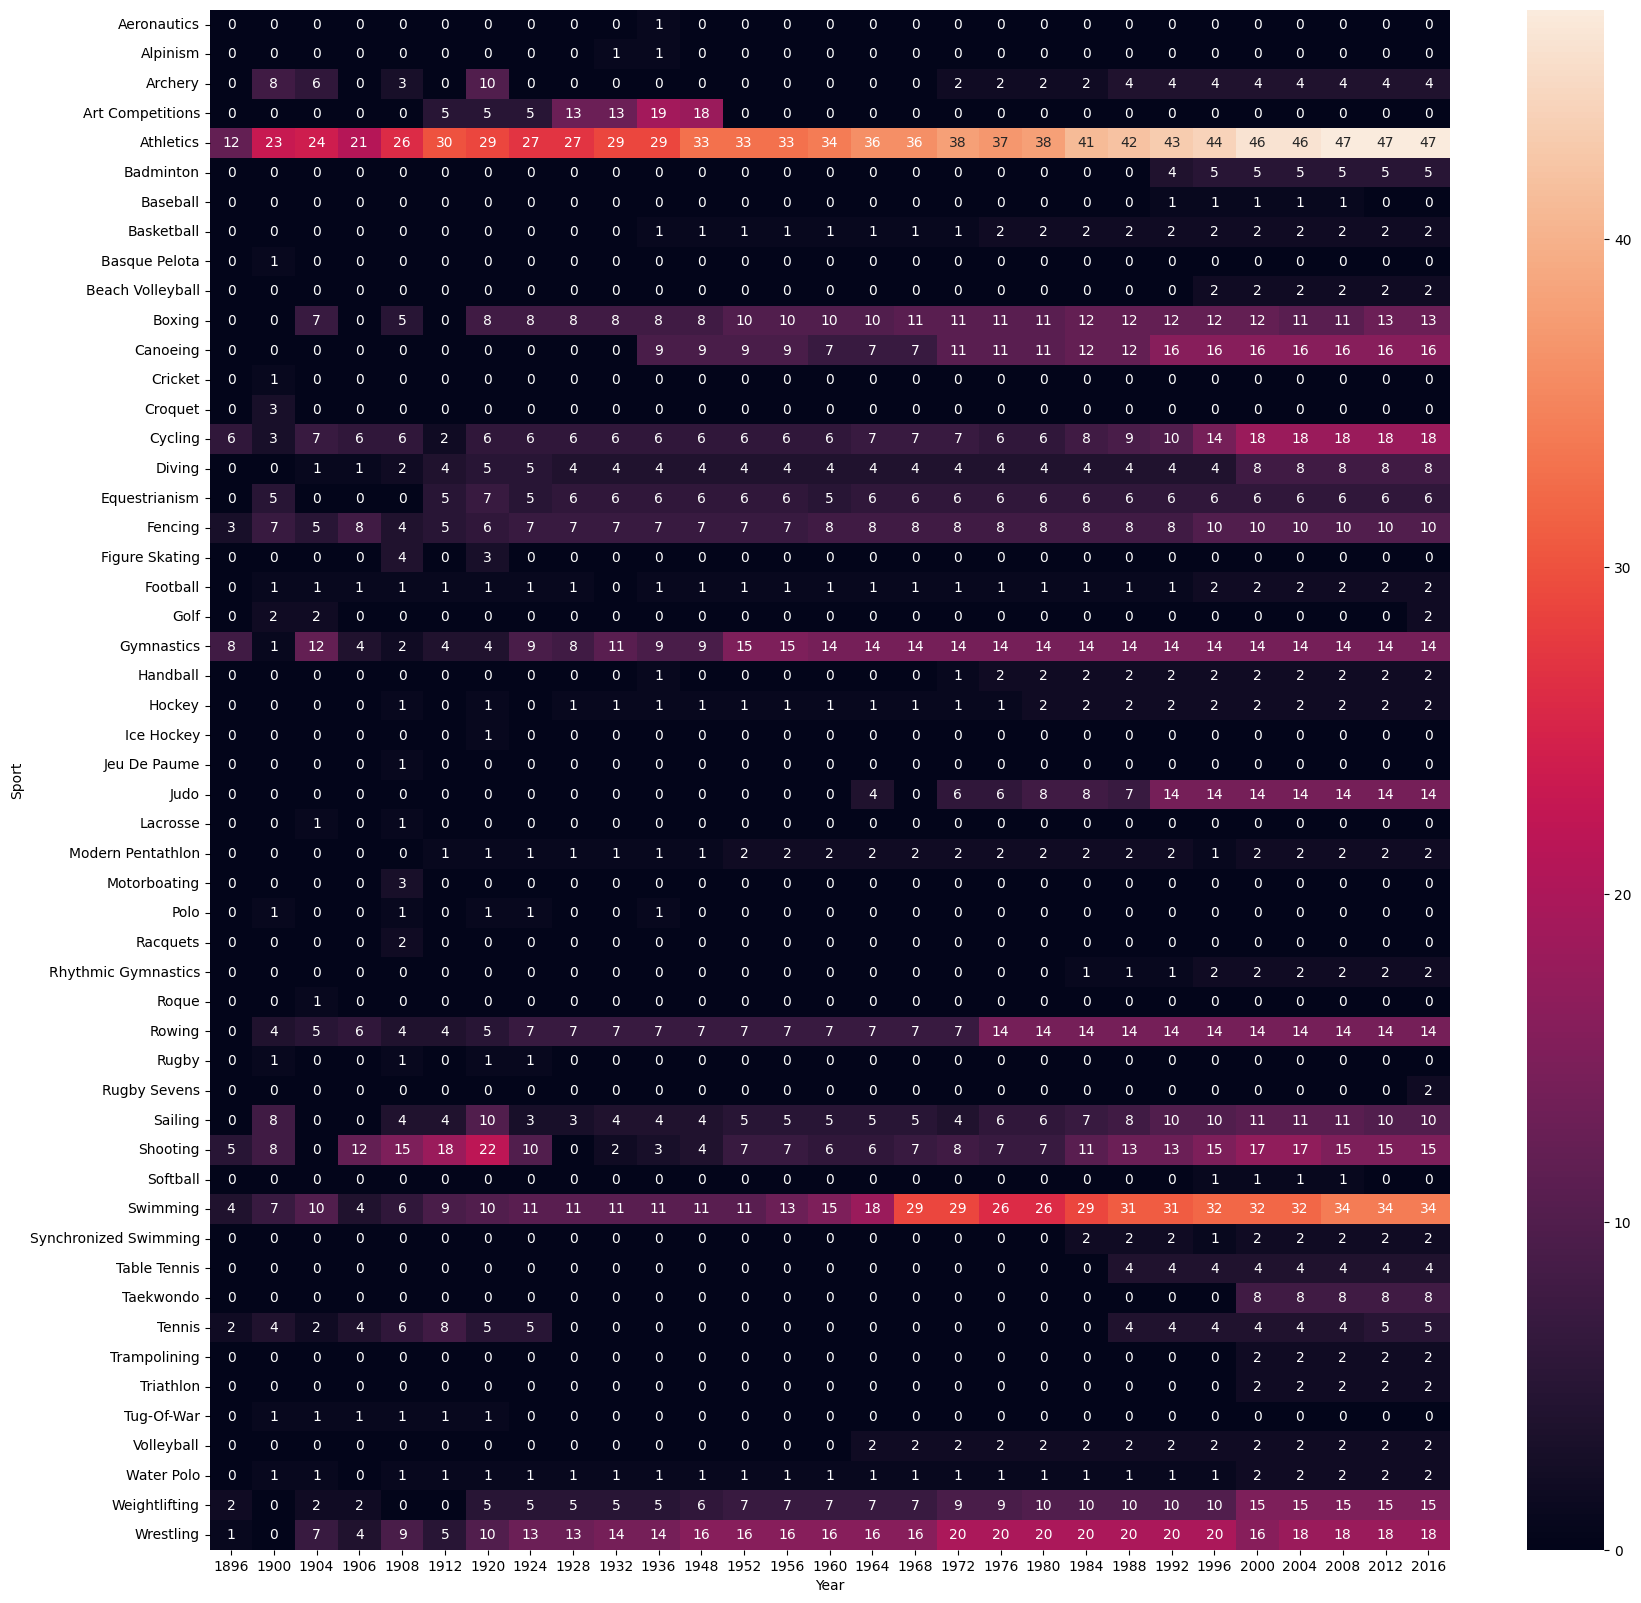

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

x = event_df.drop_duplicates(['Year', 'Sport', 'Event'])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int), annot=True)

In [30]:
def get_most_successful_athlete(df, sport="", country=""):
    temp_df = df.dropna(subset=["Medal"])

    if len(sport) != 0 and sport != "Overall":
        temp_df = temp_df[temp_df["Sport"] == sport]

    if len(country) != 0:
        temp_df = temp_df[temp_df["region"] == country]

    temp_df = (
        temp_df["Name"]
        .value_counts()
        .reset_index()
        .head(15)
        .merge(temp_df, left_on="index", right_on="Name", how="left")
    )

    temp_df = temp_df[
        ["index", "Name_x", "Sport", "region"]
    ].drop_duplicates("index")

    temp_df.rename(
        columns={
            "index": "Name",
            "Name_x": "Medals",
            "region": "Country",
        },
        inplace=True,
    )
    return temp_df.reset_index(drop=True)

In [31]:
get_most_successful_athlete(event_df, sport='Gymnastics')

,Name,Medals,Sport,Country
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
1,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
2,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
3,Takashi Ono,13,Gymnastics,Japan
4,Sawao Kato,12,Gymnastics,Japan
5,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
6,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
7,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
8,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
9,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


### Country Wise
- Countrywise medal tally per year (lineplot)
- What countries are good at heatmap
- Most successful Atheletes (Top 10)

In [32]:
temp_df = event_df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

new_df = temp_df[temp_df['region'] == 'USA']
new_df = new_df.groupby('Year').count()['Medal'].reset_index()

C:\Program Files\KMSpico\temp\ipykernel_10620\1810390526.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
fig = px.line(new_df, x='Year', y='Medal')
fig.show()

In [34]:
event_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


<AxesSubplot: title={'center': "China's Performance Over the year"}, xlabel='Year', ylabel='Sport'>

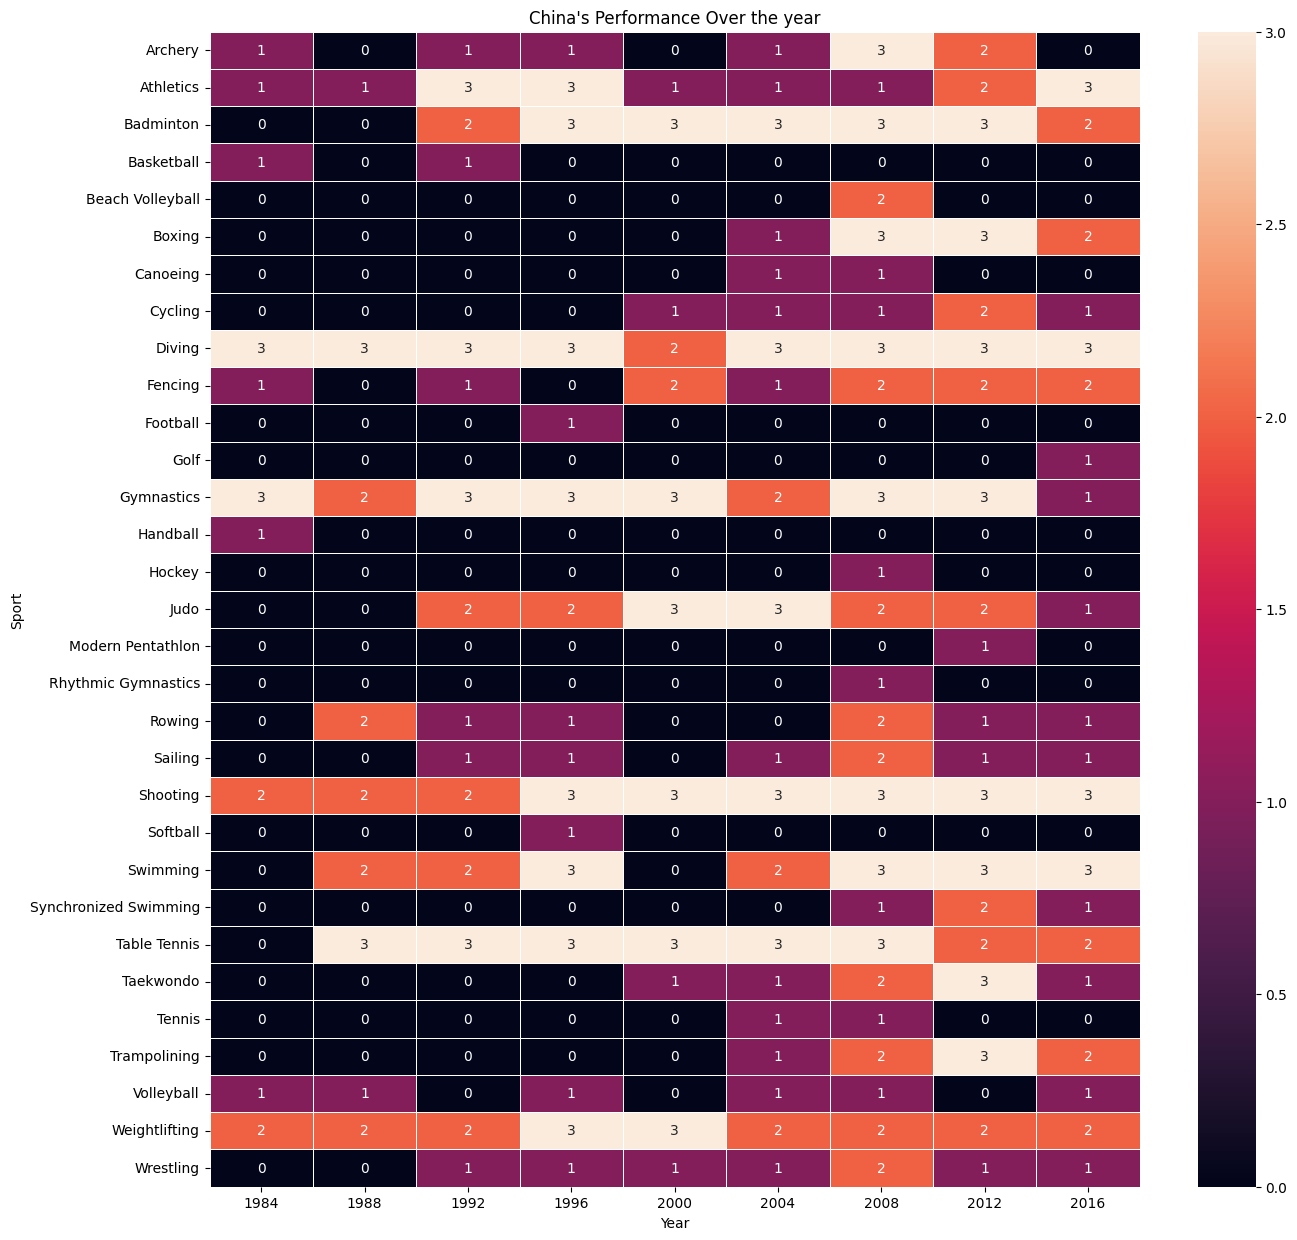

In [35]:
country_medal_over_years = event_df.dropna(subset=['Medal']).drop_duplicates(subset=['Year', 'Sport', 'City', 'region', 'Medal'])
country_medal_over_years = country_medal_over_years[country_medal_over_years['region']=='China']
pivot = country_medal_over_years.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count', fill_value=0)
plt.figure(figsize=(15,15))
plt.title("China's Performance Over the year")
sns.heatmap(pivot, annot=True, linewidths=.5)

### Athlete Wise Analysis

In [36]:
import plotly.figure_factory as ff
athlete_df = event_df.drop_duplicates(subset=['Name', 'region'])
fig = ff.create_distplot([athlete_df['Age'].dropna()], ['Age Distribution'], show_hist=False, show_rug=False)
fig.show()

In [40]:
athlete_df = event_df.drop_duplicates(subset=['Name', 'region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False, show_rug=False)
fig.show()